### Omar Tamer
# EDA


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Understand the Data

In [2]:
df = pd.read_csv('data.csv')
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


## Check Data Types & Missing Values

In [3]:
len(df['Booking_ID'].unique()) == len(df) #--> this is just an ID with unique values, so I will drop it.

True

In [4]:
df.drop(['Booking_ID', 'date of reservation'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  bookin

In [6]:
target = 'booking status'

categorical_features = ['type of meal', 'room type', 'market segment type']

numerical_features = ['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'car parking space', 'lead time', 'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests', ]

In [7]:
df.isnull().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
booking status              0
dtype: int64

## Check for Duplicates

In [8]:
df.duplicated().sum()

10747

- There are a lot of duplicate records, we must drop them.

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(25538, 15)

## Check for Outlier 

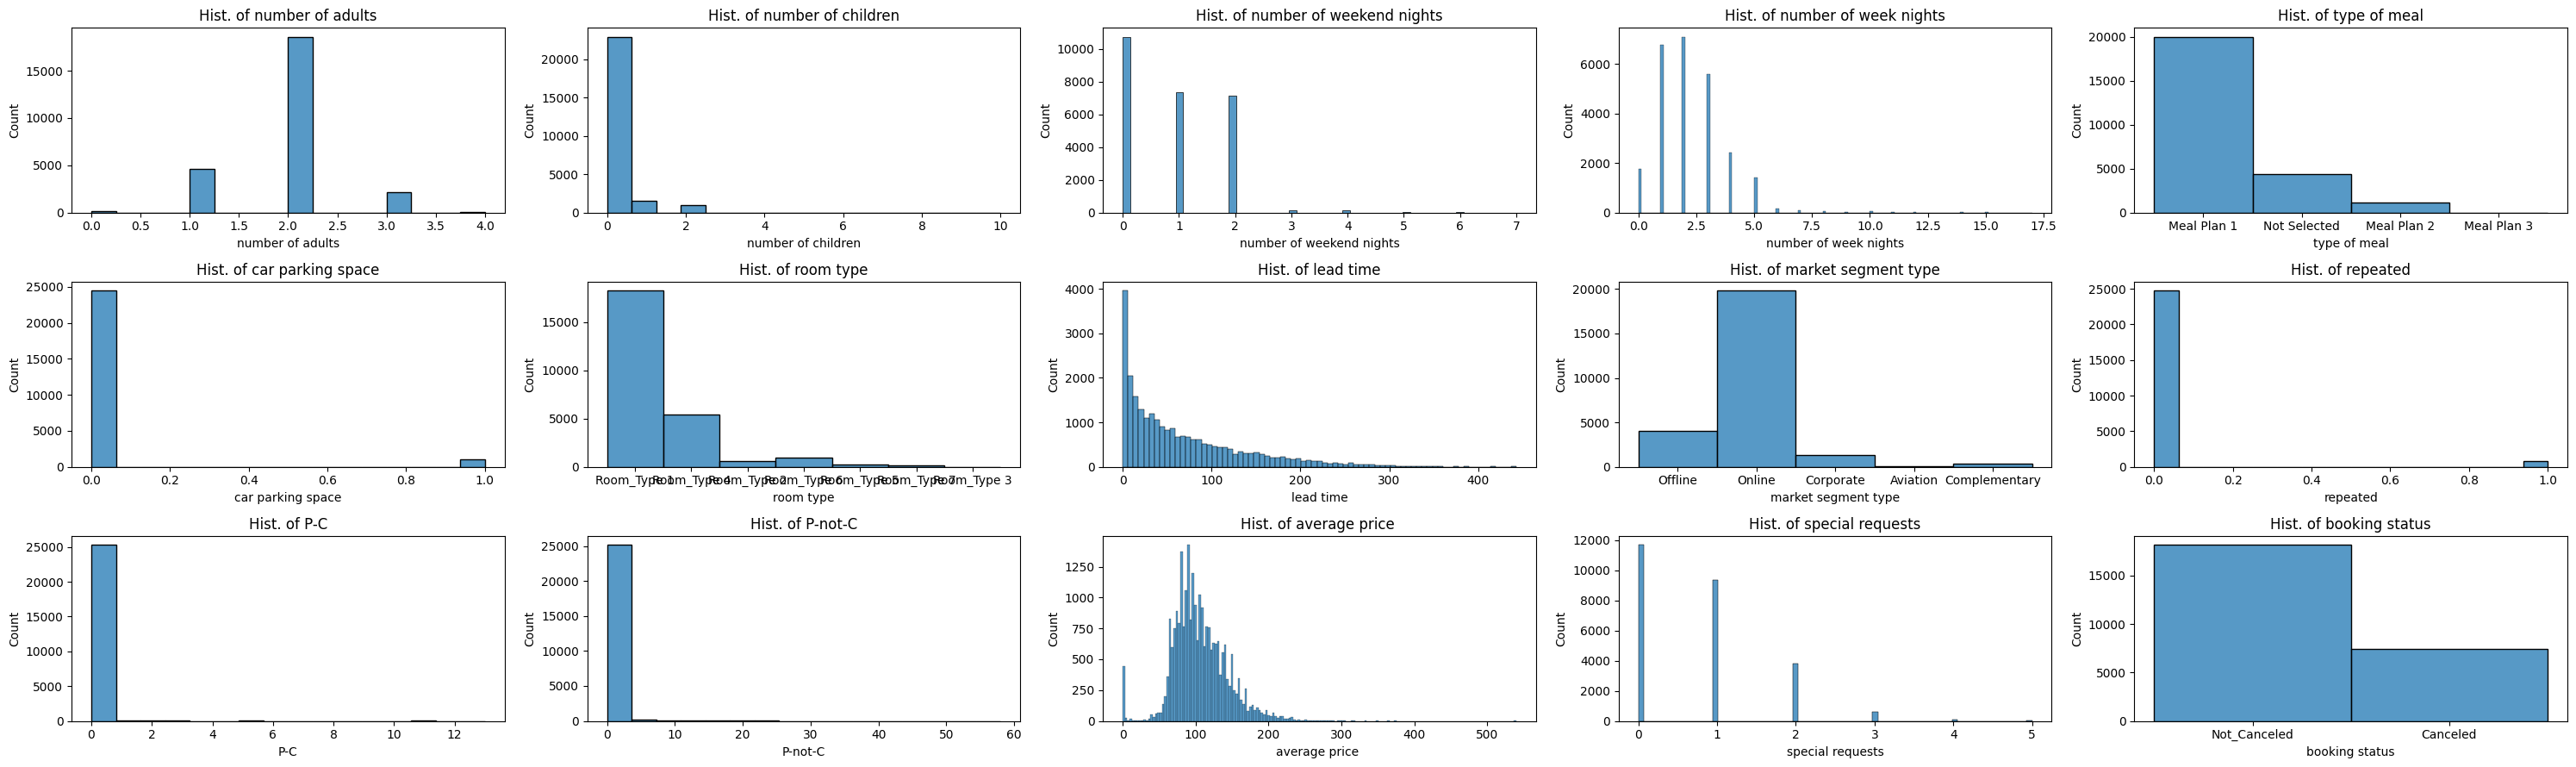

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(30, 9))
axes = axes.flatten()

# Loop over columns and plot using seaborn
for ax, col in zip(axes, df.keys()):
    sns.histplot(df[col], ax=ax)
    ax.set_title(f"Hist. of {col}")

plt.tight_layout()
plt.show()

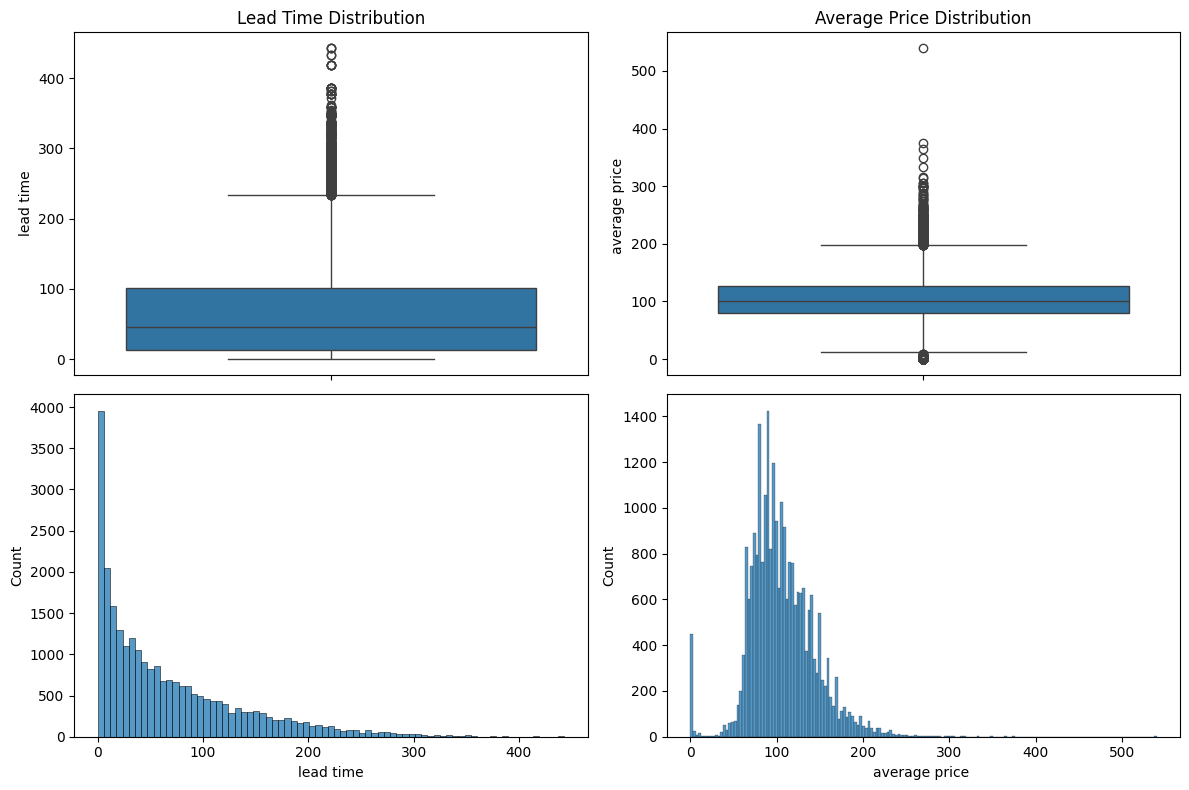

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 

sns.boxplot(df['lead time'], ax=axes[0, 0])
axes[0, 0].set_title("Lead Time Distribution")

sns.boxplot(df['average price '], ax=axes[0, 1])
axes[0, 1].set_title("Average Price Distribution")

sns.histplot(df['lead time'], ax=axes[1, 0])
sns.histplot(df['average price '], ax=axes[1, 1])

plt.tight_layout()
plt.show()


- lead time and average price have outliers that needs to be removed.

In [13]:
outliers_cols = ["lead time", "average price "]
for column in outliers_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

## Summarize the Data

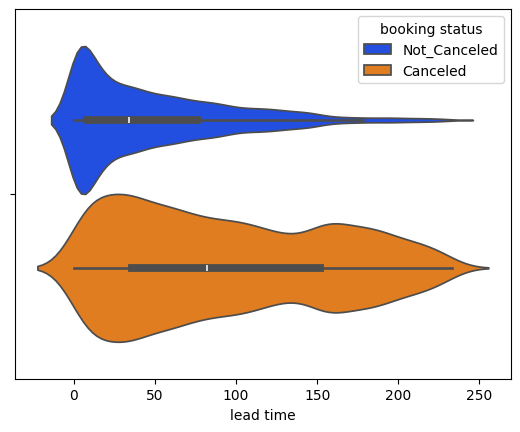

In [15]:
sns.violinplot(data=df, x = 'lead time', hue='booking status', palette='bright')
plt.show()

- Reservations that has high lead time are more likely to be canceled.

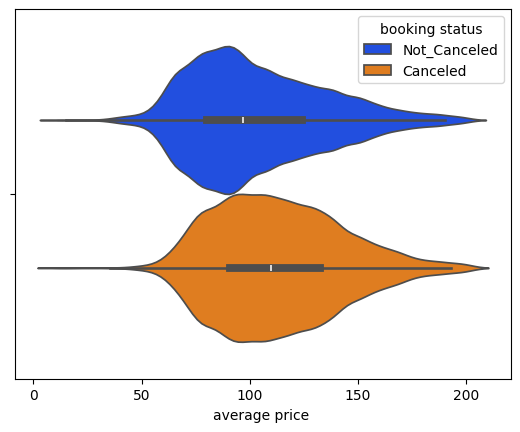

In [16]:
sns.violinplot(data=df, x = 'average price ', hue='booking status', palette='bright')
plt.show()

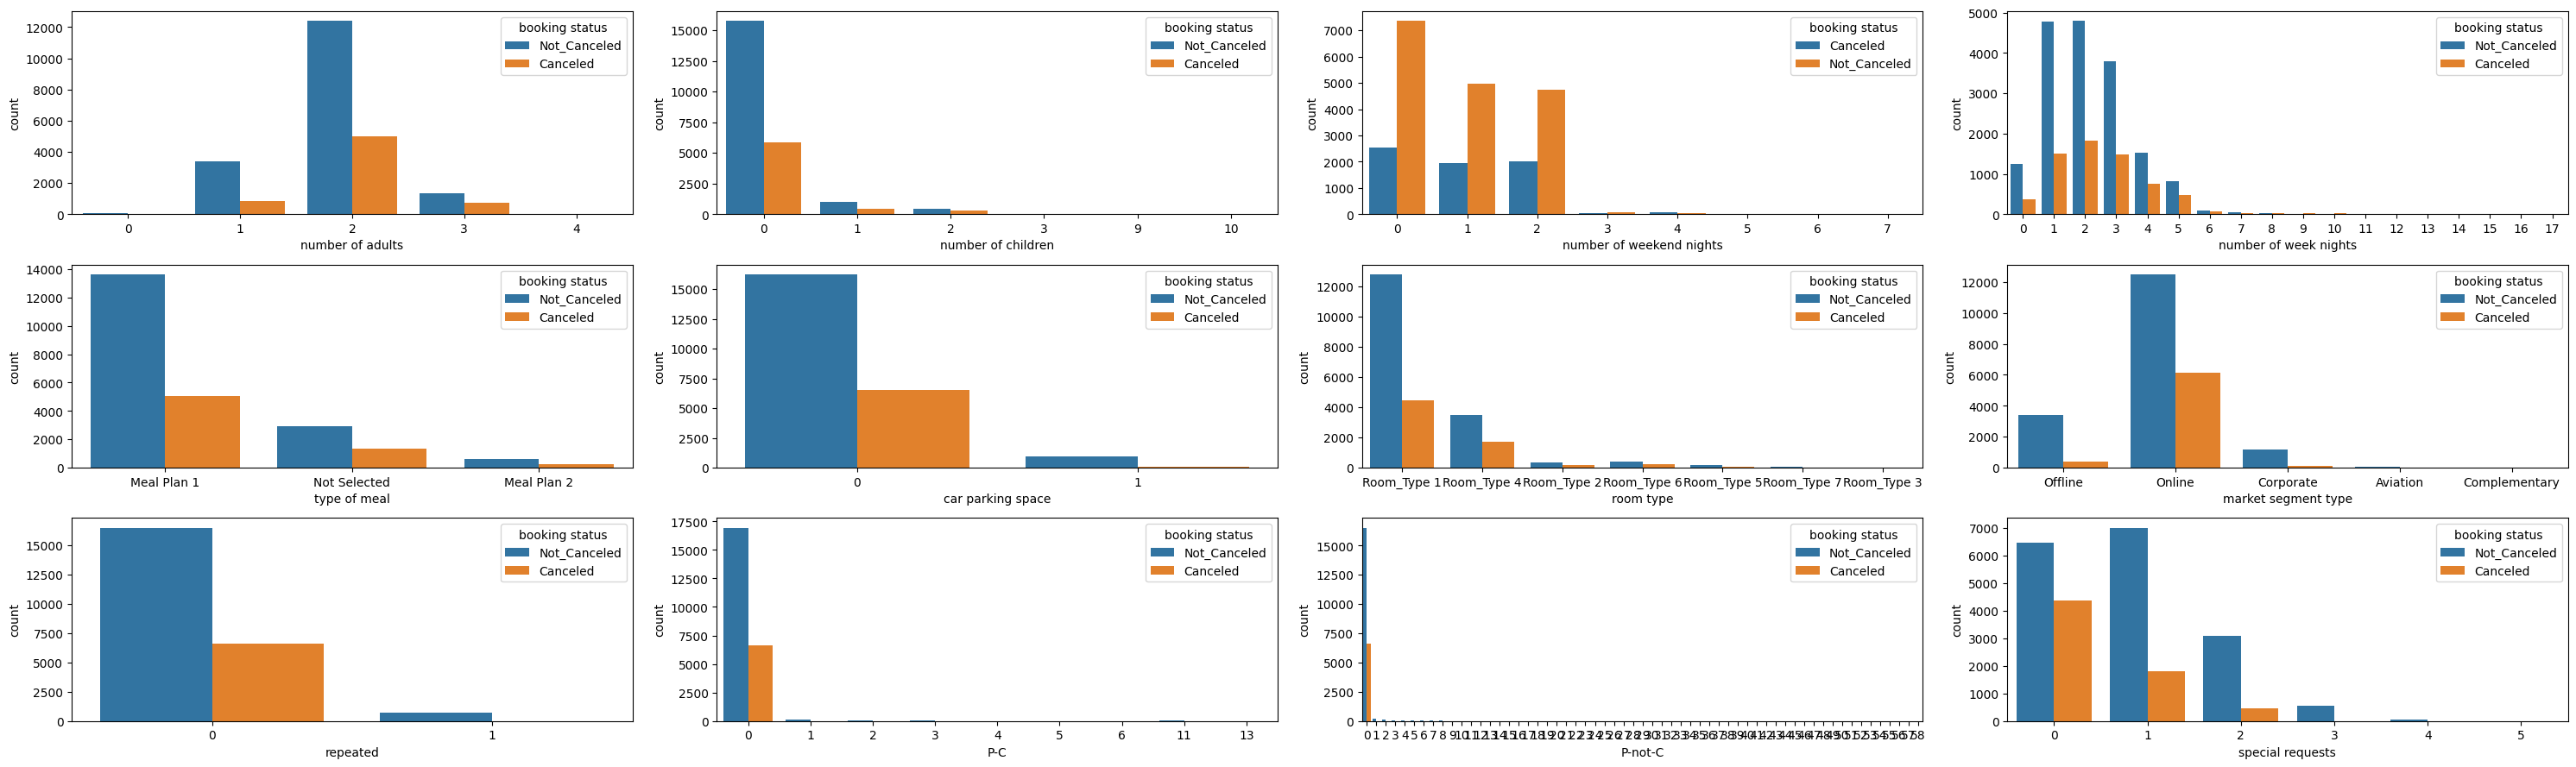

In [18]:
features_to_plot = ['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'special requests']

target = 'booking status'

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30, 9))
axes = axes.flatten()

# Loop over columns and plot using seaborn
for ax, col in zip(axes, features_to_plot):
    sns.countplot(data = df, x = df[col], hue =  target, ax=ax)

plt.tight_layout()
plt.show()

- Reservations that has a car parking space are less likely to be canceled.
- Reservations that are made online are more likely to be canceled than that made offline or by corporate.
- Repeated reservations are less likely to be canceled.

## plots for ppt

<Axes: xlabel='car parking space', ylabel='count'>

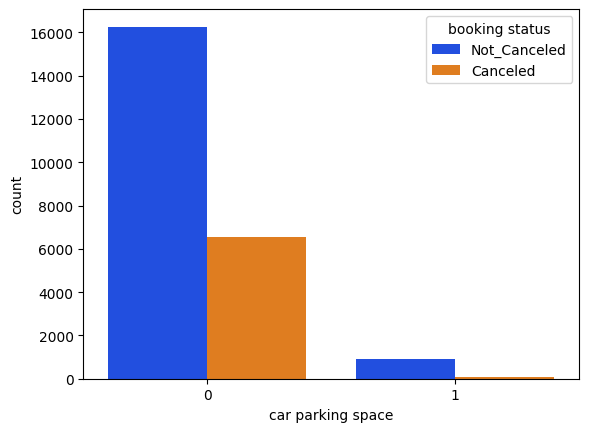

In [20]:
sns.countplot(data=df, x= df['car parking space'], hue=target, palette='bright')

<Axes: xlabel='market segment type', ylabel='count'>

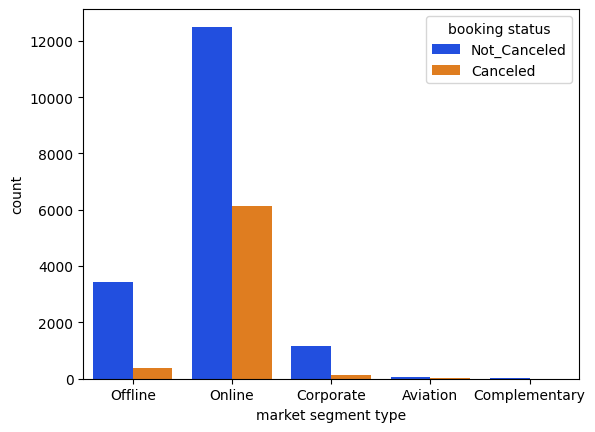

In [21]:
sns.countplot(data=df, x= df['market segment type'], hue=target, palette='bright')

<Axes: xlabel='repeated', ylabel='count'>

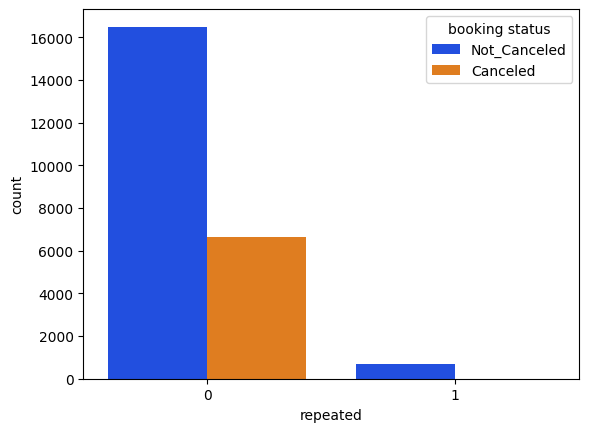

In [22]:
sns.countplot(data=df, x= df['repeated'], hue=target, palette='bright')